 # hw12  RELATION Sapfile1

In [1]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('Sapfile1.arff', names = ['ge', 
    'cst',
    'tnp',
    'twp',
    'iap',
    'esp',
    'arr',
    'ms',
    'ls',
    'as', 
    'fmi',
    'fs',
    'fq',
    'mq',
    'fo',
    'mo',
    'nf',
    'sh',
    'ss',
    'me',
    'tt',
    'atd'], skiprows=27)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
ge     131 non-null object
cst    131 non-null object
tnp    131 non-null object
twp    131 non-null object
iap    131 non-null object
esp    131 non-null object
arr    131 non-null object
ms     131 non-null object
ls     131 non-null object
as     131 non-null object
fmi    131 non-null object
fs     131 non-null object
fq     131 non-null object
mq     131 non-null object
fo     131 non-null object
mo     131 non-null object
nf     131 non-null object
sh     131 non-null object
ss     131 non-null object
me     131 non-null object
tt     131 non-null object
atd    131 non-null object
dtypes: object(22)
memory usage: 22.6+ KB


In [3]:
data = df.copy()
data.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,5,3,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,63,89,40,52,38,115,58,59,91,62,78,56


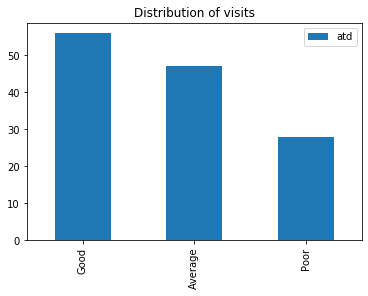

In [4]:
df['atd'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Distribution of visits');

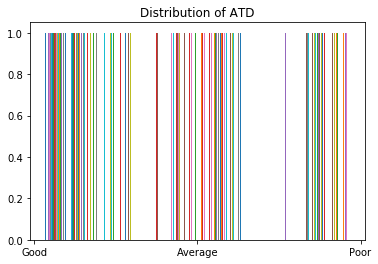

In [5]:
#проверим на сбалансированность
plt.hist(df.loc[:,'atd'], bins = 3)
plt.title('Distribution of ATD');

In [6]:
print(data.shape)
data.columns

(131, 22)


Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

In [7]:
data =data.drop(['ms'], axis=1) # all are Unmarried
data.head()

,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [8]:
#df = df.replace({'Voice mail plan': d})
#d = {'M': 'm', 'F': 'w'} # ge - gender and F is woman 
#data['ge'] = data['ge'].map(d)
#data
df['atd'].value_counts()


Good       56
Average    47
Poor       28
Name: atd, dtype: int64

#y
percentile = {'Good': 0.8, 'Average': 0.6, 'Poor':0.45}
y = data['atd'].map(percentile)
data = data.drop(['atd'], axis=1)
print(y, '\n', data)

percentile_value = {'Best': 0.9, 'Vg': 0.7, 'Good': 0.5, 'Pass': 0.35, 'Fail':0.25}
print(percentile_value)
# числовые признаки
col_value = df.loc[:,['tnp','twp','iap','esp']]
print(col_value)
col_value['tnp'] = col_value['tnp'].map(percentile_value)
col_value['twp'] = col_value['twp'].map(percentile_value)
col_value['iap'] = col_value['iap'].map(percentile_value)
col_value['esp'] = col_value['esp'].map(percentile_value)
print(col_value)
data = data.drop(['tnp','twp','iap','esp'], axis = 1)

In [9]:
for _c in data.select_dtypes(include=['object']).columns:
      data[_c]  = pd.Categorical(data[_c])
data_transformed = pd.get_dummies(data, drop_first=True)#
data_transformed.astype(int)

,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,tnp_Good,tnp_Pass,tnp_Vg,twp_Good,twp_Pass,twp_Vg,iap_Good,iap_Pass,iap_Vg,esp_Good,esp_Pass,esp_Vg,arr_Y,ls_V,as_Paid,fmi_High,fmi_Low,fmi_Medium,fmi_Vh,fs_Large,fs_Small,fq_12,fq_Degree,fq_Il,fq_Pg,fq_Um,mq_12,mq_Degree,mq_Il,mq_Pg,mq_Um,fo_Farmer,fo_Others,fo_Retired,fo_Service,mo_Housewife,mo_Others,mo_Retired,mo_Service,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small,atd_Good,atd_Poor
0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
127,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
128,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
129,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
y =data_transformed.loc[:,['atd_Good', 'atd_Poor']]

data_transformed= data_transformed.drop(['atd_Good', 'atd_Poor'], axis=1) 
y

,atd_Good,atd_Poor
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
126,0,1
127,0,0
128,1,0
129,0,0


In [11]:
data_transformed.columns

Index(['ge_M', 'cst_MOBC', 'cst_OBC', 'cst_SC', 'cst_ST', 'tnp_Good',
       'tnp_Pass', 'tnp_Vg', 'twp_Good', 'twp_Pass', 'twp_Vg', 'iap_Good',
       'iap_Pass', 'iap_Vg', 'esp_Good', 'esp_Pass', 'esp_Vg', 'arr_Y', 'ls_V',
       'as_Paid', 'fmi_High', 'fmi_Low', 'fmi_Medium', 'fmi_Vh', 'fs_Large',
       'fs_Small', 'fq_12', 'fq_Degree', 'fq_Il', 'fq_Pg', 'fq_Um', 'mq_12',
       'mq_Degree', 'mq_Il', 'mq_Pg', 'mq_Um', 'fo_Farmer', 'fo_Others',
       'fo_Retired', 'fo_Service', 'mo_Housewife', 'mo_Others', 'mo_Retired',
       'mo_Service', 'nf_Large', 'nf_Small', 'sh_Good', 'sh_Poor',
       'ss_Private', 'me_Ben', 'me_Eng', 'me_Hin', 'tt_Large', 'tt_Small'],
      dtype='object')

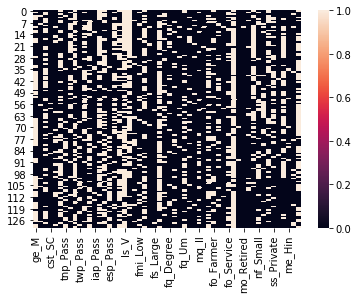

In [12]:
import seaborn as sns
sns.heatmap(data_transformed.iloc[:,:]);

In [13]:
data_transformed = data_transformed.drop(['mo_Housewife'], axis = 1)#дуже корелює

data_transformed = pd.concat([data_transformed, col_value], axis = 1, sort = 'feature_names')
data_transformed

In [14]:
print(data_transformed.columns)
data_transformed.astype(int)

Index(['ge_M', 'cst_MOBC', 'cst_OBC', 'cst_SC', 'cst_ST', 'tnp_Good',
       'tnp_Pass', 'tnp_Vg', 'twp_Good', 'twp_Pass', 'twp_Vg', 'iap_Good',
       'iap_Pass', 'iap_Vg', 'esp_Good', 'esp_Pass', 'esp_Vg', 'arr_Y', 'ls_V',
       'as_Paid', 'fmi_High', 'fmi_Low', 'fmi_Medium', 'fmi_Vh', 'fs_Large',
       'fs_Small', 'fq_12', 'fq_Degree', 'fq_Il', 'fq_Pg', 'fq_Um', 'mq_12',
       'mq_Degree', 'mq_Il', 'mq_Pg', 'mq_Um', 'fo_Farmer', 'fo_Others',
       'fo_Retired', 'fo_Service', 'mo_Others', 'mo_Retired', 'mo_Service',
       'nf_Large', 'nf_Small', 'sh_Good', 'sh_Poor', 'ss_Private', 'me_Ben',
       'me_Eng', 'me_Hin', 'tt_Large', 'tt_Small'],
      dtype='object')


,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,tnp_Good,tnp_Pass,tnp_Vg,twp_Good,twp_Pass,twp_Vg,iap_Good,iap_Pass,iap_Vg,esp_Good,esp_Pass,esp_Vg,arr_Y,ls_V,as_Paid,fmi_High,fmi_Low,fmi_Medium,fmi_Vh,fs_Large,fs_Small,fq_12,fq_Degree,fq_Il,fq_Pg,fq_Um,mq_12,mq_Degree,mq_Il,mq_Pg,mq_Um,fo_Farmer,fo_Others,fo_Retired,fo_Service,mo_Others,mo_Retired,mo_Service,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small
0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
127,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
128,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
129,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 53 columns):
ge_M          131 non-null uint8
cst_MOBC      131 non-null uint8
cst_OBC       131 non-null uint8
cst_SC        131 non-null uint8
cst_ST        131 non-null uint8
tnp_Good      131 non-null uint8
tnp_Pass      131 non-null uint8
tnp_Vg        131 non-null uint8
twp_Good      131 non-null uint8
twp_Pass      131 non-null uint8
twp_Vg        131 non-null uint8
iap_Good      131 non-null uint8
iap_Pass      131 non-null uint8
iap_Vg        131 non-null uint8
esp_Good      131 non-null uint8
esp_Pass      131 non-null uint8
esp_Vg        131 non-null uint8
arr_Y         131 non-null uint8
ls_V          131 non-null uint8
as_Paid       131 non-null uint8
fmi_High      131 non-null uint8
fmi_Low       131 non-null uint8
fmi_Medium    131 non-null uint8
fmi_Vh        131 non-null uint8
fs_Large      131 non-null uint8
fs_Small      131 non-null uint8
fq_12         131 non-null uint8
fq_D

## RandomForestClassifier

In [16]:
x = data_transformed.iloc[:, :].values
#print(x, '\n\n', y)
# разбить на обучающую выборку и тестовую можно функцией
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((91, 53), (40, 53), (91, 2), (40, 2))

In [17]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
from sklearn.metrics  import accuracy_score
#scores = cross_val_score(clf_rf, x_train, y_train, cv=2)
#print('scores: ', scores)  
print('accuracy score: ', accuracy_score(y_test, clf_rf.predict(x_test)))

accuracy score:  0.575


In [19]:
#clf_rf.score(x_test, y_test)

#### GridSearch

In [20]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 15, 20, 50],
            'n_estimators': [10, 20, 100] }

In [21]:
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)

In [22]:
grid_searcher.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=15, n_estimators=10, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.1s finished
C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [23]:
clf_best = grid_searcher.best_estimator_
clf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
clf_best.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
grid_searcher.best_score_

0.5604395604395604

In [26]:
#для тестовой 
grid_searcher.score(x_test, y_test)

0.575

#### Cross validation

In [27]:
from sklearn.metrics  import accuracy_score
# разбиваем на два подмножества / фолда, параметр cv и получаем точность для каждого
#1 без grid_searcher.best_score_
scores = cross_val_score(clf_rf, x_train, y_train, cv=2)
print('scores mean: ', scores.mean())  
#y_pred = clf_rf.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, clf_rf.predict(x_test)))

scores mean:  0.42898550724637685
accuracy score:  0.575


In [28]:
#2 з grid_searcher.best_score_
scores = cross_val_score(clf_best, x_train, y_train, cv=2)
print('scores: ', scores.mean())  
y_pred = clf_rf.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

scores:  0.4623188405797102
accuracy score:  0.575


# Сохранение и загрузка моделей

In [29]:
from sklearn.externals import joblib

# предполагаем что clf - обучен выше
path_to_pkl = os.path.join(os.getcwd(), 'rf_classifier.model')
joblib.dump(clf, path_to_pkl, compress=1)
clf_rf = joblib.load(path_to_pkl)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
# График важности параметров

In [31]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 50],
            'n_estimators': [10, 20, 100]
        }
clf_rf = RandomForestClassifier()
clf_rf.fit(x_test, y_test)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
importances = clf_rf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

[0.0273378  0.00238463 0.03055434 0.00185311 0.00095238 0.0220463
 0.01483159 0.01394984 0.01305365 0.06969338 0.02611334 0.01297945
 0.01757455 0.01675958 0.06224931 0.02102371 0.02462939 0.03034065
 0.02538801 0.0489109  0.01705215 0.00296908 0.0188434  0.01198205
 0.0072806  0.04372899 0.01142557 0.01997921 0.04109837 0.0027972
 0.01650494 0.02275804 0.00845386 0.01361669 0.         0.02481805
 0.03787767 0.0107946  0.         0.00214264 0.         0.
 0.03955339 0.05131252 0.02310889 0.01152503 0.01735843 0.01586546
 0.         0.01569884 0.00749393 0.00899485 0.01233964]


In [33]:
print( len(importances))

53


In [51]:
indices = np.argsort(importances)[::-1]
names_indices = indices
indices

array([ 9, 14, 43, 19, 25, 28, 42, 36,  2, 17,  0, 10, 18, 35, 16, 44, 31,
        5, 15, 27, 22, 12, 46, 20, 13, 30, 47, 49,  6,  7, 33,  8, 11, 52,
       23, 45, 26, 37, 51, 32, 50, 24, 21, 29,  1, 39,  3,  4, 38, 40, 41,
       34, 48], dtype=int64)

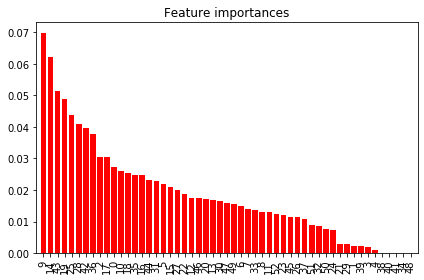

In [52]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="r")
plt.xticks(range(len(importances)), names_indices, rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()

In [53]:
range(len(importances))

range(0, 53)

In [37]:
importances

array([0.0273378 , 0.00238463, 0.03055434, 0.00185311, 0.00095238,
       0.0220463 , 0.01483159, 0.01394984, 0.01305365, 0.06969338,
       0.02611334, 0.01297945, 0.01757455, 0.01675958, 0.06224931,
       0.02102371, 0.02462939, 0.03034065, 0.02538801, 0.0489109 ,
       0.01705215, 0.00296908, 0.0188434 , 0.01198205, 0.0072806 ,
       0.04372899, 0.01142557, 0.01997921, 0.04109837, 0.0027972 ,
       0.01650494, 0.02275804, 0.00845386, 0.01361669, 0.        ,
       0.02481805, 0.03787767, 0.0107946 , 0.        , 0.00214264,
       0.        , 0.        , 0.03955339, 0.05131252, 0.02310889,
       0.01152503, 0.01735843, 0.01586546, 0.        , 0.01569884,
       0.00749393, 0.00899485, 0.01233964])

## new x.shape = (131, 10)

In [38]:
x.shape

(131, 53)

In [39]:
#X = x[:,:11]

In [54]:
X = np.delete(x, [0, 10, 18, 35, 16, 44, 31,
        5, 15, 27, 22, 12, 46, 20, 13, 30, 47, 49,  6,  7, 33,  8, 11, 52,
       23, 45, 26, 37, 51, 32, 50, 24, 21, 29,  1, 39,  3,  4, 38, 40, 41,
       34, 48], axis = 1)
#X = np.delete(x, np.s_[::20], axis = 1)

In [55]:
X.shape

(131, 10)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((98, 10), (33, 10), (98, 2), (33, 2))

In [57]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
print('accuracy score: ', accuracy_score(y_test, clf_rf.predict(x_test)))

accuracy score:  0.45454545454545453


In [59]:
#GridSearch
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)
grid_searcher.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.7s finished
C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [60]:
grid_searcher.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
grid_searcher.best_score_

0.5306122448979592

In [62]:
#для тестовой 
grid_searcher.score(x_test, y_test)

0.48484848484848486

In [63]:
#для тестовой 
grid_searcher.score(x_test, y_test)

0.48484848484848486

In [64]:
#2 з grid_searcher.best_score_
scores = cross_val_score(clf_best, x_train, y_train, cv=2)
print('scores: ', scores)  
y_pred = clf_rf.predict(x_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

scores:  [0.51020408 0.44897959]
accuracy score:  0.45454545454545453
